<a href="https://colab.research.google.com/github/joypatel18/university-project/blob/main/Dm_ml_code_part2_22048830.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data
from __future__ import print_function
from google.colab import drive
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data mining and machine learning-A/real-LFB Incident data Last 3 years-real.xlsx')


In [ ]:
#Printing out the head of the data
df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000001-01012020,01 Jan 2020,2020,00:02:11,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,000003-01012020,01 Jan 2020,2020,00:06:30,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,324.0,Hillingdon,292.0,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,000004-01012020,01 Jan 2020,2020,00:07:07,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,000008-01012020,01 Jan 2020,2020,00:11:05,0,False Alarm,AFA,NaN,Non Residential,Telephone exchange,...,195.0,Richmond,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,000009-01012020,01 Jan 2020,2020,00:11:16,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,426.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Dropping some useless variables
df = df.drop(['IncidentNumber', 'DateOfCall', 'TimeOfCall', 'Latitude', 'Longitude'], axis=1)
df = df.drop(['Postcode_full', 'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode', 'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m', 'Easting_rounded', 'Northing_rounded', 'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime'], axis=1)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,2020,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,2020,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,2020,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,2020,0,False Alarm,AFA,NaN,Non Residential,Telephone exchange,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,2020,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Replacing string with integer of CalYear
df['CalYear'] = df['CalYear'].replace({2020: 0, 2021: 1, 2022: 2, 2023: 3})
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,False Alarm,AFA,NaN,Non Residential,Telephone exchange,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Replacing string with integer of Special Service
# Mapping the unique values to integers
incident_group_map = {'Special Service': 0, 'Fire': 1, 'False Alarm': 2}
# Using the `replace()` method to replace the values
df['IncidentGroup'] = df['IncidentGroup'].replace(incident_group_map)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,AFA,NaN,Non Residential,Telephone exchange,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Replacing string with integer of Special Service
# mapping the unique values to new values
mapping = {'Special Service':0, 'Primary Fire':1, 'AFA':2, 'Secondary Fire':3,
       'False alarm - Good intent':4, 'False alarm - Malicious':5,
       'Chimney Fire':6, 'Flood call attended - Batch mobilised':7,
       'Use of Special Operations Room':8, 'Late Call':9}

# using replace method to replace the values
df['StopCodeDescription'] = df['StopCodeDescription'].replace(mapping)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,NaN,Non Residential,Private Garden Shed,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,NaN,Non Residential,Telephone exchange,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,NaN,Outdoor Structure,Small refuse/rubbish container,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Replacing string with integer of Special Service Type
# Define a dictionary mapping unique values to integer values
value_dict = {
    'Lift Release': 0,
    'Effecting entry/exit': 1,
    'RTC': 2,
    'Other Transport incident': 3,
    'Spills and Leaks (not RTC)': 4,
    'Medical Incident': 5,
    'Other rescue/release of persons': 6,
    'Flooding': 7,
    'Assist other agencies': 8,
    'Removal of objects from people': 9,
    'No action (not false alarm)': 10,
    'Advice Only': 11,
    'Animal assistance incidents': 12,
    'Hazardous Materials incident': 13,
    'Making Safe (not RTC)': 14,
    'Suicide/attempts': 15,
    'Evacuation (no fire)': 16,
    'Stand By': 17,
    'Rescue or evacuation from water': 18,
    'Water provision': 19,
    # Add more values here as necessary
}

# Use replace to replace the unique values in the SpecialServiceType column with integer values
df['SpecialServiceType'] = df['SpecialServiceType'].replace(value_dict)

# Print the updated DataFrame
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,NaN,Non Residential,Private Garden Shed,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,NaN,Non Residential,Telephone exchange,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,NaN,Outdoor Structure,Small refuse/rubbish container,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Filling the missing values with the most repeated value of the column
mode_value = df['SpecialServiceType'].mode()[0]
df['SpecialServiceType'].fillna(mode_value, inplace=True)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,Non Residential,Private Garden Shed,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,Non Residential,Telephone exchange,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,Outdoor Structure,Small refuse/rubbish container,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Replacing string with integer of Property Category
# Define a dictionary mapping unique values to integer values
value_dict = {
    'Dwelling': 0,
    'Non Residential': 1,
    'Outdoor Structure': 2,
    'Other Residential': 3,
    'Outdoor': 4,
    'Road Vehicle': 5,
    'Aircraft': 6,
    'Rail Vehicle': 7,
    'Boat': 8
}
# Use replace to replace the unique values in the PropertyCategory column with integer values
df['PropertyCategory'] = df['PropertyCategory'].replace(value_dict)
# Print the updated DataFrame
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,0,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,1,Private Garden Shed,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,0,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,1,Telephone exchange,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,2,Small refuse/rubbish container,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Removing another useless variable
df = df.drop(['PropertyType'], axis=1)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,0,Within same building,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,1,On land associated with building,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,0,Within same building,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,1,Correct incident location,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,2,On land associated with building,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Replacing string with integer of Address Qualifier
# Define a dictionary mapping unique values to integer values
value_dict = {
    'Within same building': 0,
    'On land associated with building': 1,
    'Correct incident location': 2,
    'In street outside gazetteer location': 3,
    'In street close to gazetteer location': 4,
    'Open land/water - nearest gazetteer location': 5,
    'Nearby address - no building in street': 6,
    'On motorway / elevated road': 7,
    'In street remote from gazetteer location': 8,
    'Nearby address - street not listed in gazetteer': 9,
    'Railway land or rolling stock': 10
}

# Use replace to replace the unique values in the AddressQualifier column with integer values
df['AddressQualifier'] = df['AddressQualifier'].replace(value_dict)

# Print the updated DataFrame
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,0,0,London,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,1,1,London,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,0,0,London,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,1,2,London,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,2,1,London,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Replacing string with integer of Special Service
# Mapping the unique values to integers
incident = {'London': 0}
# Using the `replace()` method to replace the values
df['FRS'] = df['FRS'].replace(incident)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,AddressQualifier,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,0,0,0,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,1,1,0,Hillingdon,Hillingdon,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,0,0,0,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,1,2,0,Richmond,Richmond,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,2,1,0,Edmonton,Edmonton,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Removing other useless variables
df = df.drop(['FirstPumpArriving_DeployedFromStation', 'SecondPumpArriving_DeployedFromStation'], axis=1)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,AddressQualifier,FRS,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,0,0,0,Lambeth,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,1,1,0,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,0,0,0,Hornsey,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,1,2,0,Richmond,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,2,1,0,Edmonton,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Removing the final useless variable
df = df.drop(['IncidentStationGround'], axis=1)
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,AddressQualifier,FRS,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,0,0,0,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,1,1,0,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,0,0,0,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,1,2,0,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,2,1,0,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
# Replace missing values in each column with the mean of that column
df['NumStationsWithPumpsAttending'].fillna(df['NumStationsWithPumpsAttending'].mean(), inplace=True)
df['NumPumpsAttending'].fillna(df['NumPumpsAttending'].mean(), inplace=True)
df['PumpCount'].fillna(df['PumpCount'].mean(), inplace=True)
df['PumpHoursRoundUp'].fillna(df['PumpHoursRoundUp'].mean(), inplace=True)
df['Notional Cost (£)'].fillna(df['Notional Cost (£)'].mean(), inplace=True)
df['NumCalls'].fillna(df['NumCalls'].mean(), inplace=True)
# Print the updated DataFrame
df.head()

,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,AddressQualifier,FRS,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,0,0,0,0,0.0,0,0,0,1.0,1.0,1.0,1.0,339.0,3.0
1,0,0,1,1,1.0,1,1,0,1.0,2.0,2.0,1.0,339.0,3.0
2,0,0,0,0,0.0,0,0,0,1.0,1.0,1.0,1.0,339.0,1.0
3,0,0,2,2,1.0,1,2,0,1.0,1.0,1.0,1.0,339.0,1.0
4,0,0,1,3,1.0,2,1,0,1.0,1.0,1.0,1.0,339.0,1.0


In [ ]:
#Checking the count of null values
df.isnull().sum()

CalYear                          0
HourOfCall                       0
IncidentGroup                    0
StopCodeDescription              0
SpecialServiceType               0
PropertyCategory                 0
AddressQualifier                 0
FRS                              0
NumStationsWithPumpsAttending    0
NumPumpsAttending                0
PumpCount                        0
PumpHoursRoundUp                 0
Notional Cost (£)                0
NumCalls                         0
dtype: int64

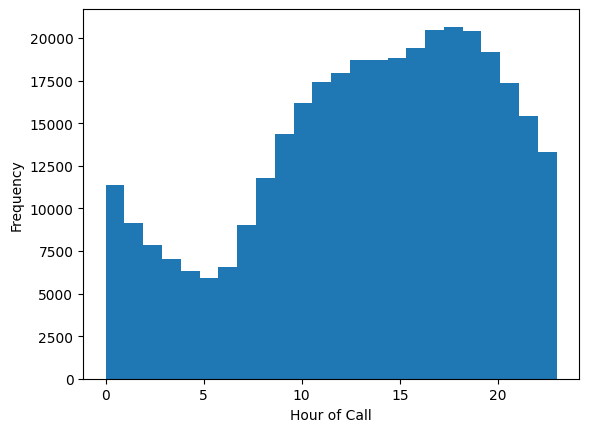

In [ ]:
#Histogram
import matplotlib.pyplot as plt
# Create a histogram of HourOfCall
plt.hist(df['HourOfCall'], bins=24)
plt.xlabel('Hour of Call')
plt.ylabel('Frequency')
plt.show()

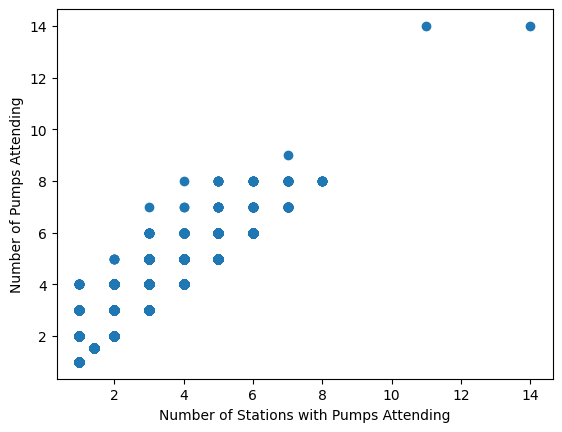

In [ ]:
#ScatterPlot
# Create a scatter plot of NumStationsWithPumpsAttending vs NumPumpsAttending
plt.scatter(df['NumStationsWithPumpsAttending'], df['NumPumpsAttending'])
plt.xlabel('Number of Stations with Pumps Attending')
plt.ylabel('Number of Pumps Attending')
plt.show()

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# Separate the features (X) and target (y) variables
X = df['StopCodeDescription'].astype(str)  # Features
y = df['PropertyCategory'].astype(str)  # Target
# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Reshape the input feature X
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
# Fit a decision tree classifier to the training data
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
# Generate predictions on the test data
y_pred = dt.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[38570     0     0     0     1     0     0     0     0]
 [13607    13     0     0     5     0     0     0     0]
 [  851     0     0     0  2229     0     0     0     0]
 [ 3546     0     0     0     0     0     0     0     0]
 [ 2531     0     0     0  2972     0     0     0     0]
 [ 4224     0     0     0     1     0     0     0     0]
 [   27     0     0     0     0     0     0     0     0]
 [   61     0     0     0     0     0     0     0     0]
 [   44     0     0     0     0     0     0     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     38571
           1       1.00      0.00      0.00     13625
           2       0.00      0.00      0.00      3080
           3       0.00      0.00      0.00      3546
           4       0.57      0.54      0.55      5503
           5       0.00      0.00      0.00      4225
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        61
           8       0.00      0.00      0.00        44

    accuracy                           0.61     68682
   macro avg       0.24      0.17      0.15     68682
weighted avg       0.59      0.61      0.47     68682



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    210823
3    116168
2     16207
4       190
1        19
Name: Cluster, dtype: int64
Clustering accuracy: -293725.2741252737


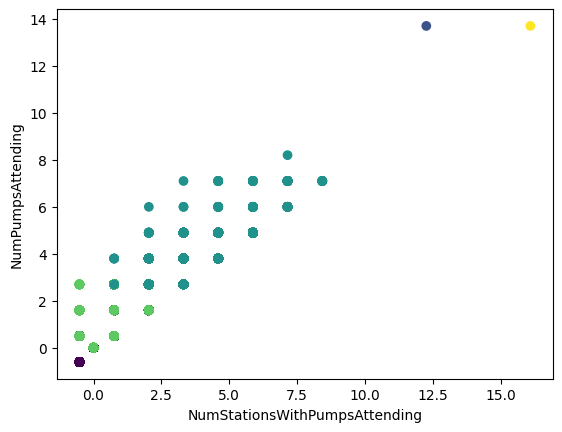

In [ ]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Selecting the columns to use for clustering
X = df[['NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpHoursRoundUp', 'Notional Cost (£)']]
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
# Print the count of observations in each cluster
print(df['Cluster'].value_counts())
# Calculate the accuracy of the clustering
accuracy = kmeans.score(X_scaled)
print("Clustering accuracy:", accuracy)
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('NumStationsWithPumpsAttending')
plt.ylabel('NumPumpsAttending')
plt.show()

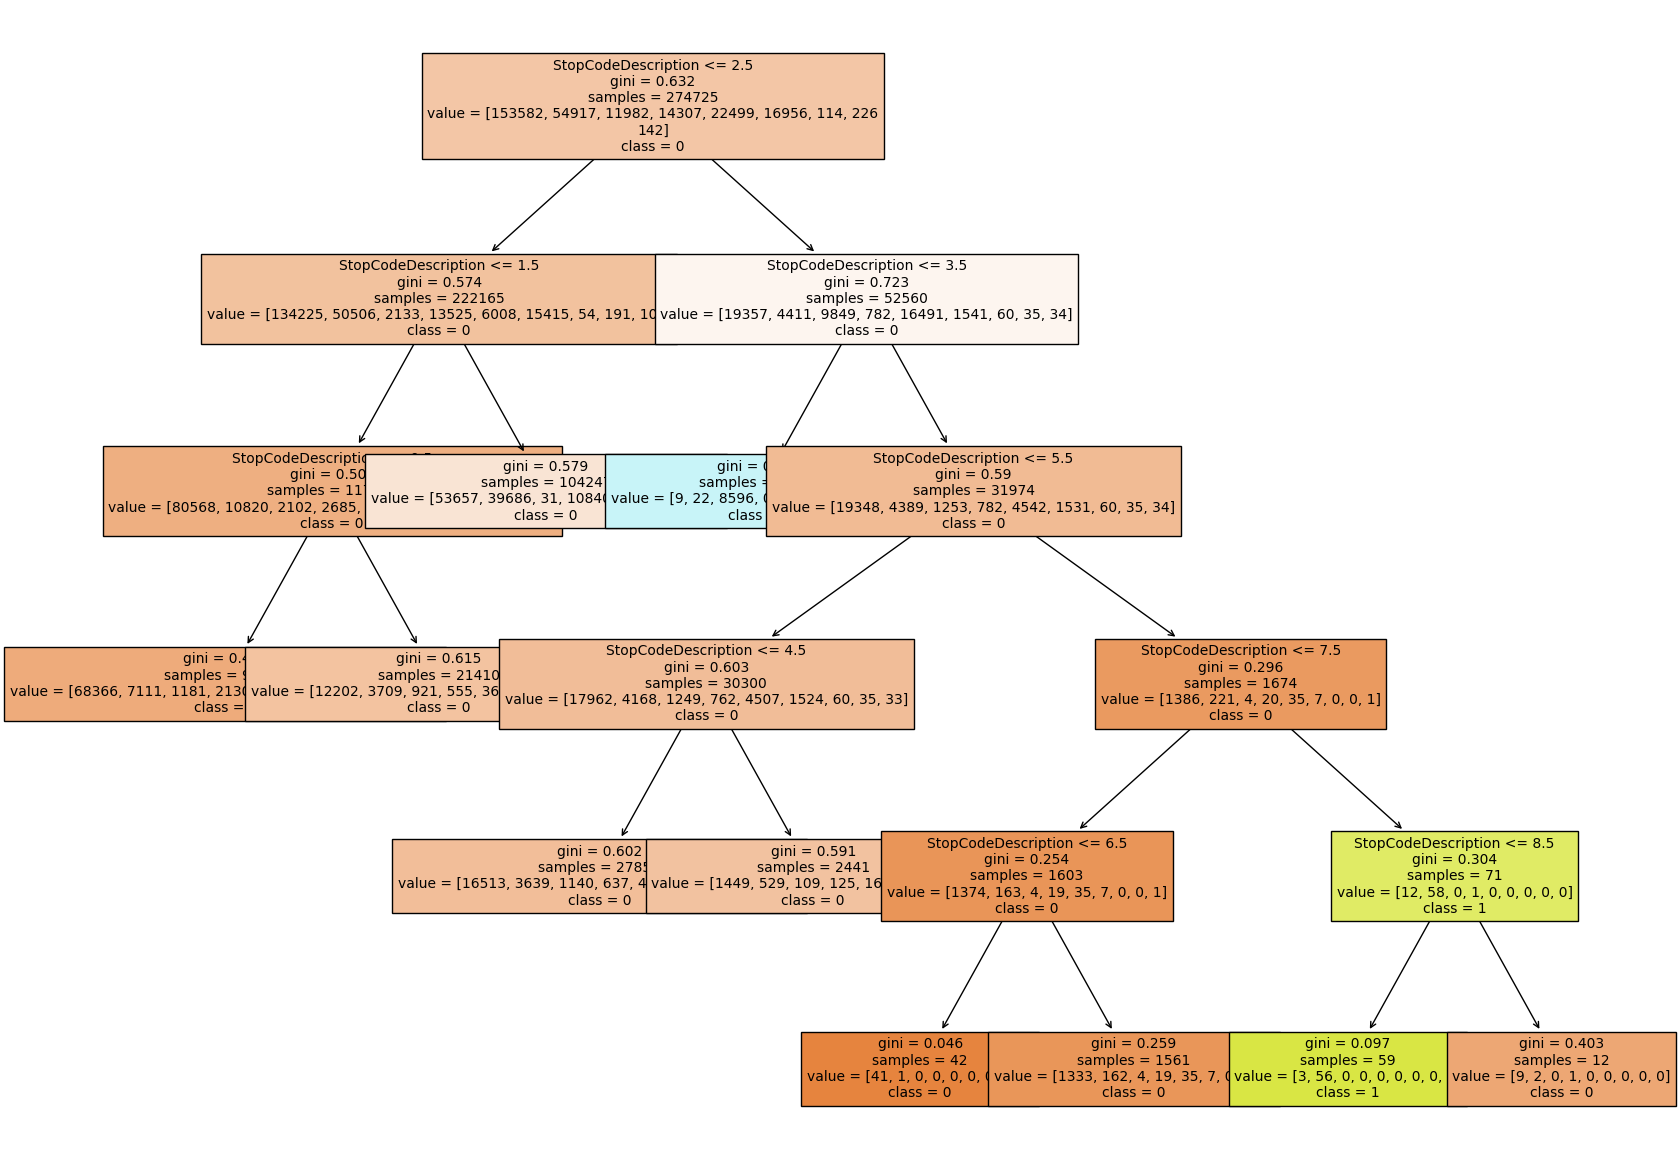

In [ ]:
# Separate the features (X) and target (y) variables
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['StopCodeDescription'], class_names=dt.classes_, fontsize=10)
plt.show(